<a href="https://colab.research.google.com/github/Someshwarms/Diamond-Price-and-Quality-prediction/blob/main/Diamond_price_and_Quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR,SVC
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,classification_report,confusion_matrix
import xgboost

**Need to import all the package and dataset which is required for this project and Link for the dataset:https://www.kaggle.com/ronil8/diamond-price-prediction-dataset**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Diamond Price Prediction.csv")
df.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.columns

Index(['Carat(Weight of Daimond)', 'Cut(Quality)', 'Color', 'Clarity', 'Depth',
       'Table', 'Price(in US dollars)', 'X(length)', 'Y(width)', 'Z(Depth)'],
      dtype='object')

In [ ]:
df.shape

(53940, 10)

**Checking is there any null values present in the dataset or not**

In [ ]:
df.isnull().sum()

Carat(Weight of Daimond)    0
Cut(Quality)                0
Color                       0
Clarity                     0
Depth                       0
Table                       0
Price(in US dollars)        0
X(length)                   0
Y(width)                    0
Z(Depth)                    0
dtype: int64

In [ ]:
df['Cut(Quality)'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: Cut(Quality), dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


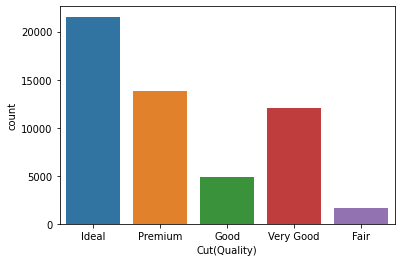

In [ ]:
sns.countplot('Cut(Quality)',data=df)

In [ ]:
df['Color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: Color, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


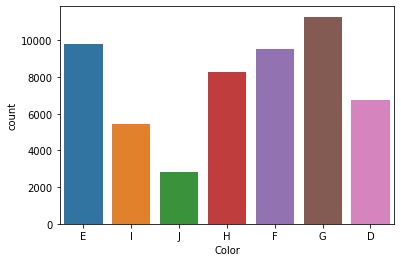

In [ ]:
sns.countplot('Color',data=df)

In [ ]:
df['Clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: Clarity, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


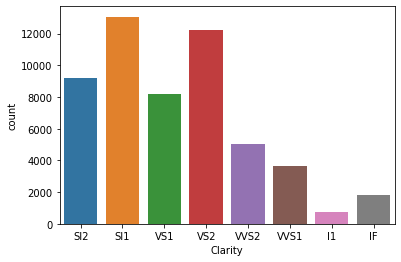

In [ ]:
sns.countplot('Clarity',data=df)

**Data Visualization**

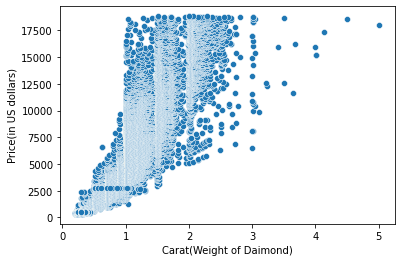

In [ ]:
sns.scatterplot(x='Carat(Weight of Daimond)',y='Price(in US dollars)',data=df)

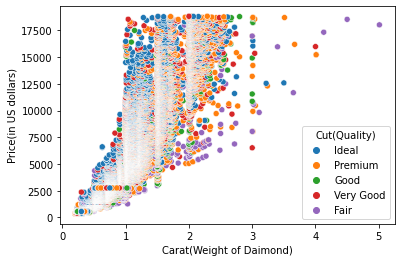

In [ ]:
sns.scatterplot(x='Carat(Weight of Daimond)',y='Price(in US dollars)',hue='Cut(Quality)',data=df)

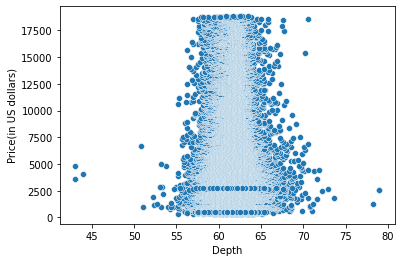

In [ ]:
sns.scatterplot(x='Depth',y='Price(in US dollars)',data=df)

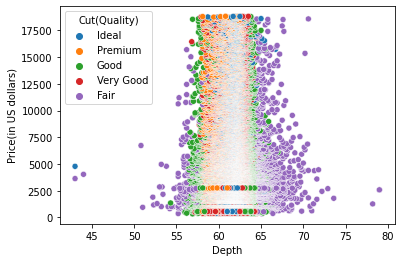

In [ ]:
sns.scatterplot(x='Depth',y='Price(in US dollars)',hue='Cut(Quality)',data=df)

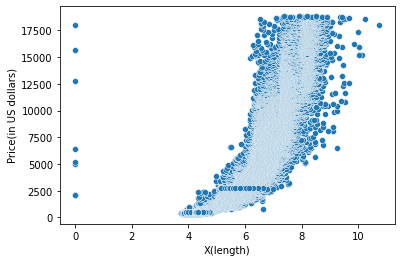

In [ ]:
sns.scatterplot(x='X(length)',y='Price(in US dollars)',data=df)

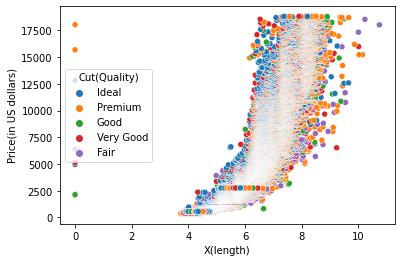

In [ ]:
sns.scatterplot(x='X(length)',y='Price(in US dollars)',hue='Cut(Quality)',data=df)

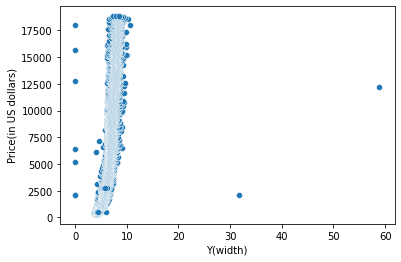

In [ ]:
sns.scatterplot(x='Y(width)',y='Price(in US dollars)',data=df)

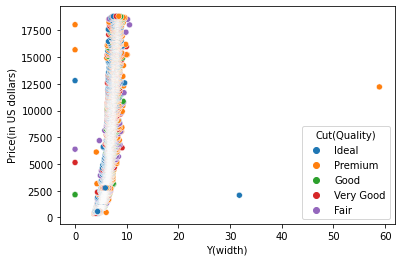

In [ ]:
sns.scatterplot(x='Y(width)',y='Price(in US dollars)',hue='Cut(Quality)',data=df)

**Lets convert all the categorical feature into numerical feature**

In [ ]:
df['Cut(Quality)'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: Cut(Quality), dtype: int64

In [ ]:
df['Cut(Quality)'].replace(to_replace="Ideal",value=1,inplace=True)
df['Cut(Quality)'].replace(to_replace="Premium",value=2,inplace=True)
df['Cut(Quality)'].replace(to_replace="Very Good",value=3,inplace=True)
df['Cut(Quality)'].replace(to_replace="Good",value=4,inplace=True)
df['Cut(Quality)'].replace(to_replace="Fair",value=5,inplace=True)

In [ ]:
df['Cut(Quality)'].value_counts()

1    21551
2    13791
3    12082
4     4906
5     1610
Name: Cut(Quality), dtype: int64

In [ ]:
df['Color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: Color, dtype: int64

In [ ]:
df['Color'].replace(to_replace="G",value=0.1,inplace=True)
df['Color'].replace(to_replace="E",value=0.2,inplace=True)
df['Color'].replace(to_replace="F",value=0.3,inplace=True)
df['Color'].replace(to_replace="H",value=0.4,inplace=True)
df['Color'].replace(to_replace="D",value=0.5,inplace=True)
df['Color'].replace(to_replace="I",value=0.6,inplace=True)
df['Color'].replace(to_replace="J",value=0.7,inplace=True)

In [ ]:
df['Color'].value_counts()

0.1    11292
0.2     9797
0.3     9542
0.4     8304
0.5     6775
0.6     5422
0.7     2808
Name: Color, dtype: int64

In [ ]:
df['Clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: Clarity, dtype: int64

In [ ]:
df['Clarity'].replace(to_replace="SI1",value=1.1,inplace=True)
df['Clarity'].replace(to_replace="SI2",value=1.2,inplace=True)
df['Clarity'].replace(to_replace="VS1",value=2.1,inplace=True)
df['Clarity'].replace(to_replace="VS2",value=2.2,inplace=True)
df['Clarity'].replace(to_replace="VVS1",value=3.2,inplace=True)
df['Clarity'].replace(to_replace="VVS2",value=3.1,inplace=True)
df['Clarity'].replace(to_replace="IF",value=4.1,inplace=True)
df['Clarity'].replace(to_replace="I1",value=4.2,inplace=True)

In [ ]:
df['Clarity'].value_counts()

1.1    13065
2.2    12258
1.2     9194
2.1     8171
3.1     5066
3.2     3655
4.1     1790
4.2      741
Name: Clarity, dtype: int64

In [ ]:
df.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,1,0.2,1.2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,2,0.2,1.1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,4,0.2,2.1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,2,0.6,2.2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,4,0.7,1.2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.corr()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
Carat(Weight of Daimond),1.000000,0.134967,0.189889,-0.251967,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
Cut(Quality),0.134967,1.000000,0.038283,-0.133797,0.218055,0.433405,0.053491,0.125565,0.121462,0.149323
Color,0.189889,0.038283,1.000000,-0.115590,0.027283,0.041964,0.090951,0.172765,0.168454,0.171666
Clarity,-0.251967,-0.133797,-0.115590,1.000000,-0.027542,-0.127291,-0.124153,-0.278878,-0.270566,-0.273746
Depth,0.028224,0.218055,0.027283,-0.027542,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
Table,0.181618,0.433405,0.041964,-0.127291,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
Price(in US dollars),0.921591,0.053491,0.090951,-0.124153,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
X(length),0.975094,0.125565,0.172765,-0.278878,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
Y(width),0.951722,0.121462,0.168454,-0.270566,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
Z(Depth),0.953387,0.149323,0.171666,-0.273746,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


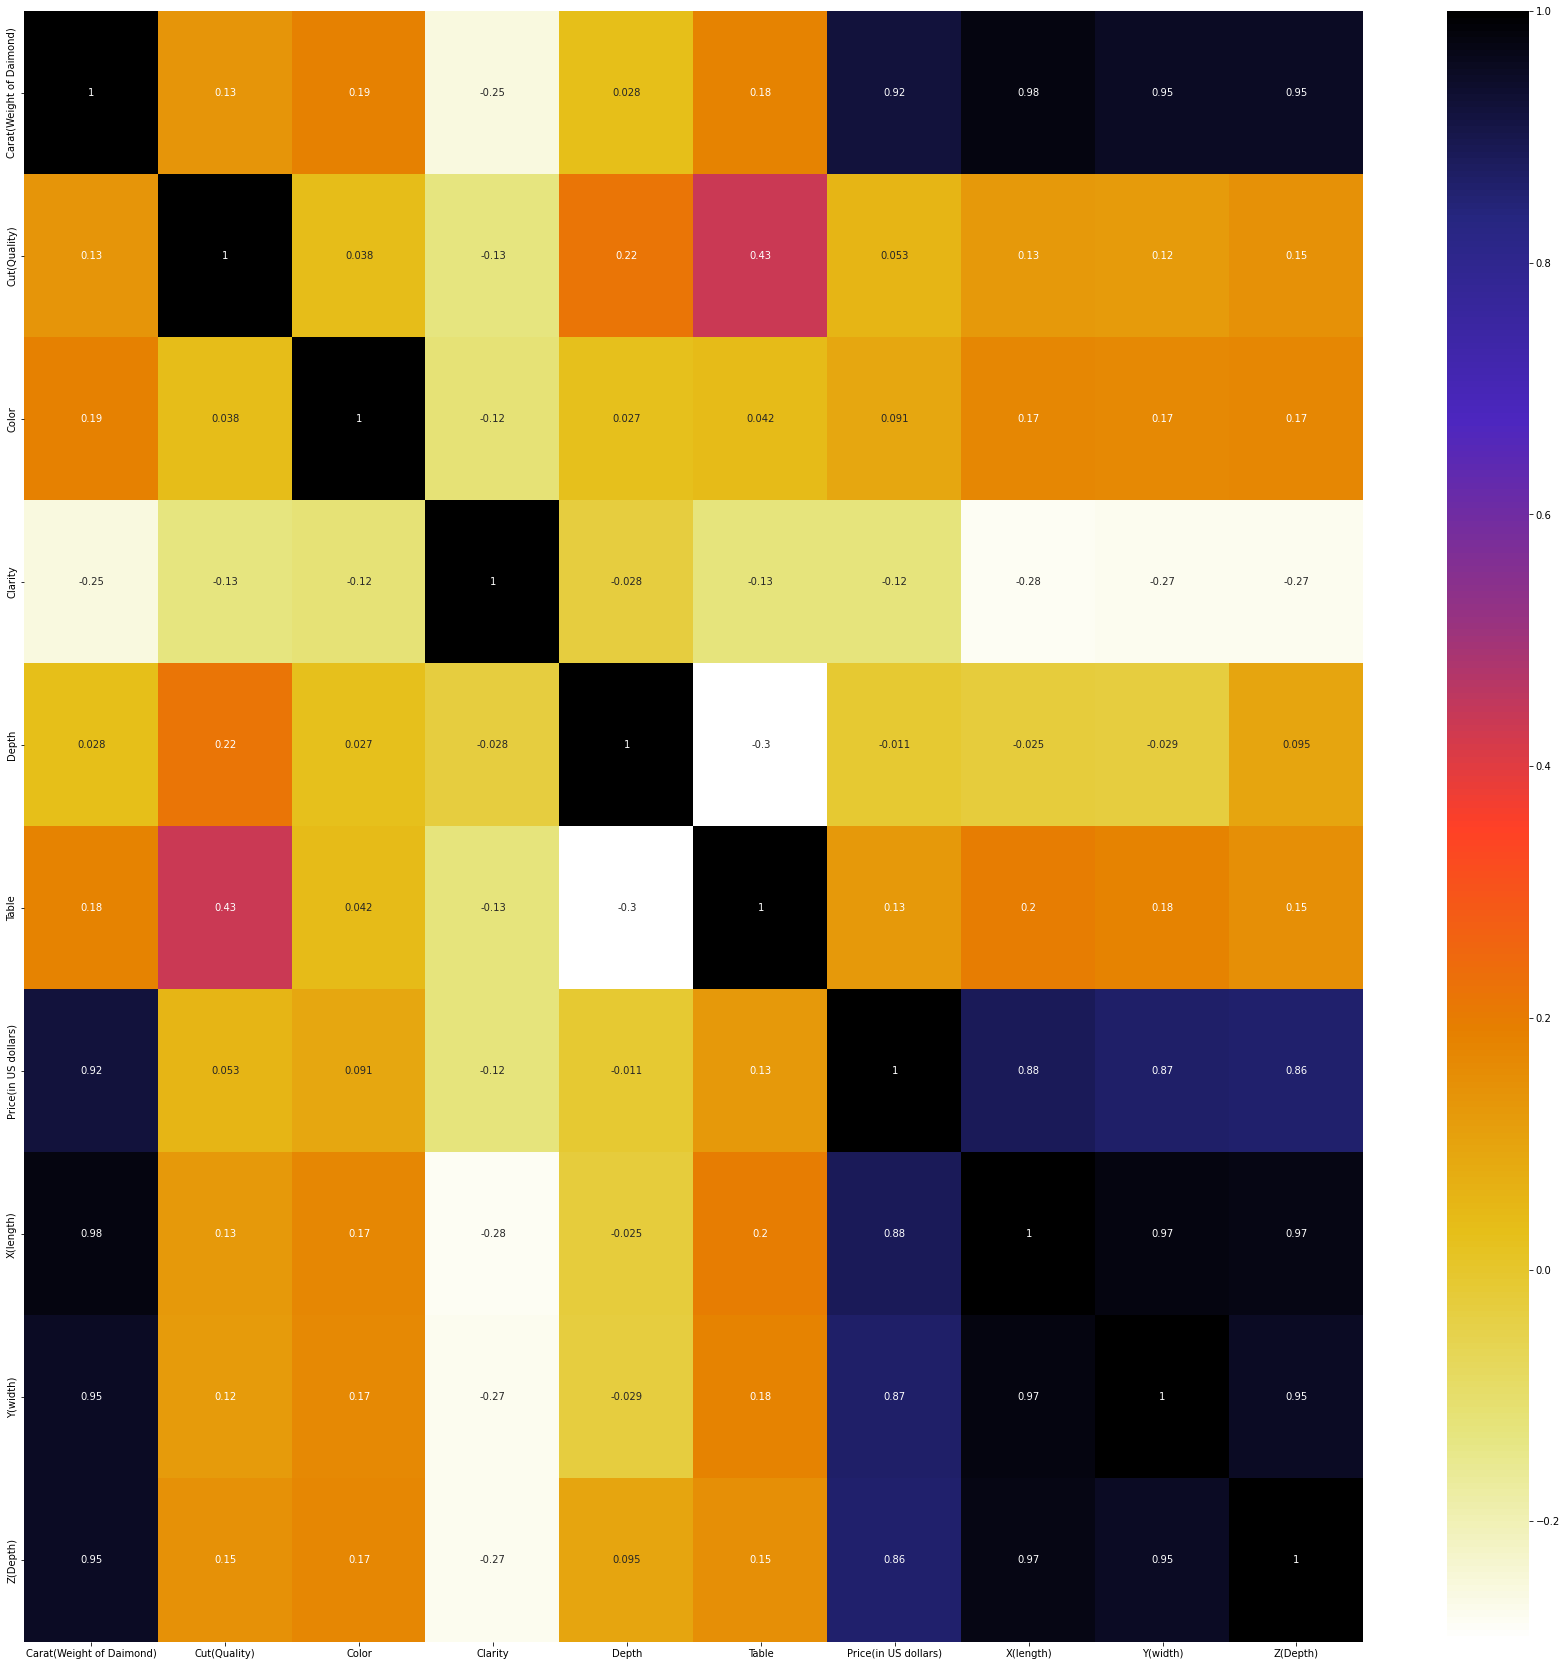

In [ ]:
plt.figure(figsize=(30,30))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df, 0.9)
len(set(corr_features))

4

In [ ]:
corr_features

{'Price(in US dollars)', 'X(length)', 'Y(width)', 'Z(Depth)'}

**As we can see there are 4 different  feature in which they have correlation from that price column is dependent feature and from the other three column we will drop Y(width) and Z(Depth) only because ther are high correlated**

In [ ]:
X=df.drop(['Y(width)','Z(Depth)','Price(in US dollars)'],axis=1)#independent Feature for regression
y=df['Price(in US dollars)']#dependent feature  for regression

In [ ]:
X.shape

(53940, 7)

In [ ]:
y.shape

(53940,)

In [ ]:
X.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,X(length)
0,0.23,1,0.2,1.2,61.5,55.0,3.95
1,0.21,2,0.2,1.1,59.8,61.0,3.89
2,0.23,4,0.2,2.1,56.9,65.0,4.05
3,0.29,2,0.6,2.2,62.4,58.0,4.20
4,0.31,4,0.7,1.2,63.3,58.0,4.34


In [ ]:
y.head()

0    326
1    326
2    327
3    334
4    335
Name: Price(in US dollars), dtype: int64

In [122]:
W=df.drop(['Cut(Quality)'],axis=1)#independent Feature for classification
z=df['Cut(Quality)']#dependent feature  for for classification

In [123]:
W.head()

,Carat(Weight of Daimond),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,0.2,1.2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,0.2,1.1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,0.2,2.1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,0.6,2.2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,0.7,1.2,63.3,58.0,335,4.34,4.35,2.75


In [124]:
z.head()

0    1
1    2
2    4
3    2
4    4
Name: Cut(Quality), dtype: int64

**Lets divide the dataset into training and testing part**

In [125]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)#for regression
X_train1,X_test1,y_train1,y_test1=train_test_split(W,z,test_size=0.3,random_state=42)#for classification

In [126]:
X_train.shape,X_train1.shape

((37758, 7), (37758, 9))

In [127]:
y_train.shape,y_train1.shape

((37758,), (37758,))

In [128]:
X_test.shape,X_test1.shape

((16182, 7), (16182, 9))

In [129]:
y_test.shape,y_test1.shape

((16182,), (16182,))

In [130]:
X_train.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,X(length)
19497,1.21,1,0.4,3.1,61.3,57.0,6.92
31229,0.31,1,0.2,2.2,62.0,56.0,4.38
22311,1.21,1,0.2,2.1,62.4,57.0,6.75
278,0.81,1,0.3,1.2,62.6,55.0,5.92
6646,0.79,1,0.6,3.1,61.7,56.0,5.94


In [131]:
X_train1.head()

,Carat(Weight of Daimond),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
19497,1.21,0.4,3.1,61.3,57.0,8131,6.92,6.87,4.23
31229,0.31,0.2,2.2,62.0,56.0,756,4.38,4.36,2.71
22311,1.21,0.2,2.1,62.4,57.0,10351,6.75,6.83,4.24
278,0.81,0.3,1.2,62.6,55.0,2795,5.92,5.96,3.72
6646,0.79,0.6,3.1,61.7,56.0,4092,5.94,5.95,3.67


In [132]:
y_train.head()

19497     8131
31229      756
22311    10351
278       2795
6646      4092
Name: Price(in US dollars), dtype: int64

In [133]:
y_train1.head()

19497    1
31229    1
22311    1
278      1
6646     1
Name: Cut(Quality), dtype: int64

**Training the model based on regression data**

In [ ]:
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
y_pred

array([  560.86,  2340.98,  1176.33, ..., 12945.21,  3227.26,  1398.64])

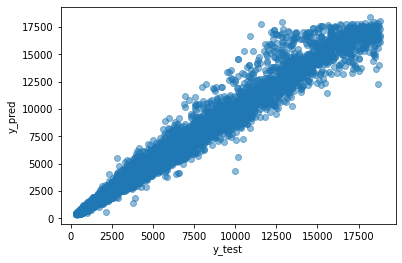

In [ ]:
plt.scatter(y_test,y_pred,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
print("MSE:",mean_squared_error(y_pred,y_test))
print("MAE:",mean_absolute_error(y_pred,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_pred,y_test)))

MSE: 313629.07056677254
MAE: 285.01803467501617
RMSE: 560.0259552616936


In [81]:
model1=AdaBoostRegressor()
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)

In [82]:
y_pred1

array([ 1086.97309658,  2924.3498708 ,  1086.97309658, ...,
       12788.26527893,  3209.24236984,  1086.97309658])

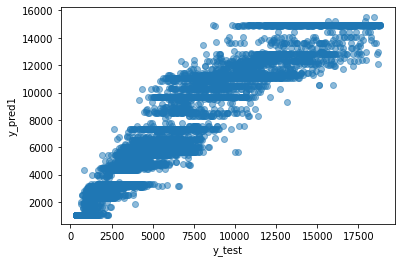

In [83]:
plt.scatter(y_test,y_pred1,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred1")
plt.show()

In [84]:
print("MSE:",mean_squared_error(y_pred1,y_test))
print("MAE:",mean_absolute_error(y_pred1,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_pred1,y_test)))

MSE: 1589836.0503452853
MAE: 921.7152439392019
RMSE: 1260.8870093490873


In [89]:
model2=GradientBoostingRegressor()
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)

In [90]:
y_pred2

array([  719.41279392,  2152.17078015,  1228.80498923, ...,
       13170.01242901,  3080.84797129,  1310.22928045])

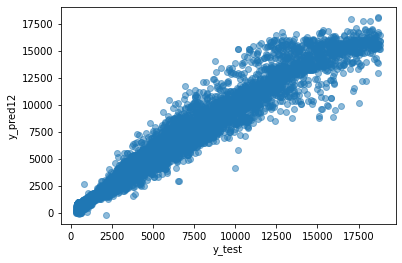

In [91]:
plt.scatter(y_test,y_pred2,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred12")
plt.show()

In [92]:
print("MSE:",mean_squared_error(y_pred2,y_test))
print("MAE:",mean_absolute_error(y_pred2,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_pred2,y_test)))

MSE: 512093.7359420602
MAE: 387.732982512005
RMSE: 715.6072497830497


In [94]:
model3=xgboost.XGBRegressor()
model3.fit(X_train,y_train)
y_pred3=model3.predict(X_test)

[13:59:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [95]:
y_pred3

array([  719.02094,  2171.1829 ,  1247.0002 , ..., 13121.793  ,
        3094.846  ,  1335.3702 ], dtype=float32)

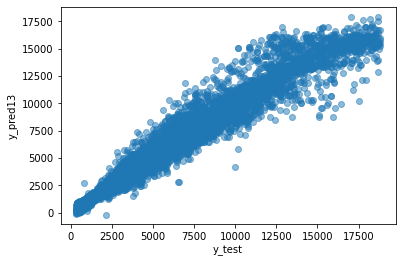

In [96]:
plt.scatter(y_test,y_pred3,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred13")
plt.show()

In [97]:
print("MSE:",mean_squared_error(y_pred3,y_test))
print("MAE:",mean_absolute_error(y_pred3,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_pred3,y_test)))

MSE: 517963.49568217865
MAE: 390.5980194453889
RMSE: 719.6968081645066


In [109]:
minmax=MinMaxScaler()
X_train_scaled=minmax.fit_transform(X_train)
X_test_scaled=minmax.transform(X_test)

In [110]:
model4=LinearRegression()
model4.fit(X_train_scaled,y_train)
y_pred4=model4.predict(X_test_scaled)

In [111]:
y_pred4

array([  972.27571718,  2573.07569771,  1674.04542468, ...,
       10247.13857349,  3388.52391767,  1639.77968197])

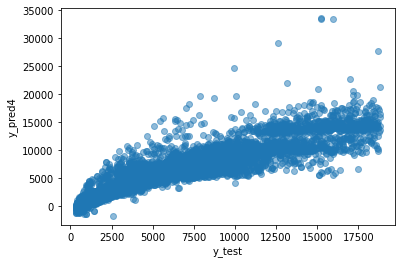

In [112]:
plt.scatter(y_test,y_pred4,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred4")
plt.show()

In [113]:
print("MSE:",mean_squared_error(y_pred4,y_test))
print("MAE:",mean_absolute_error(y_pred4,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_pred4,y_test)))

MSE: 1918378.6107652846
MAE: 841.1202940736883
RMSE: 1385.0554540397595


In [114]:
model5=SVR(kernel="rbf")
model5.fit(X_train_scaled,y_train)
y_pred5=model5.predict(X_test_scaled)

In [115]:
y_pred5

array([1151.3668232 , 1953.64127235, 1289.19320765, ..., 4085.64977748,
       2455.94588965, 1262.92830181])

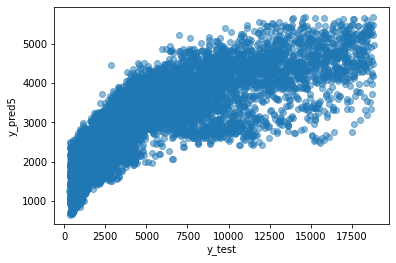

In [116]:
plt.scatter(y_test,y_pred5,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred5")
plt.show()

In [117]:
print("MSE:",mean_squared_error(y_pred5,y_test))
print("MAE:",mean_absolute_error(y_pred5,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_pred5,y_test)))

MSE: 11480936.806199664
MAE: 1954.4744923406818
RMSE: 3388.3531112030905


**Model training for Classification dataset**

In [134]:
rdf=RandomForestClassifier()
rdf.fit(X_train1,y_train1)
pred=rdf.predict(X_test1)

In [135]:
pred

array([1, 3, 1, ..., 2, 4, 1])

In [136]:
print("Accuracy_score:\n",accuracy_score(pred,y_test1)*100)
print("Confusion Matrix:\n",confusion_matrix(pred,y_test1))
print("Classifiaction Report:\n",classification_report(pred,y_test1))

Accuracy_score:
 78.72945247806204
Confusion Matrix:
 [[5953  454  763   36    3]
 [ 233 3394  672   59    8]
 [ 285  280 1901  326    8]
 [  13   13  226 1048   24]
 [   3    1    4   31  444]]
Classifiaction Report:
               precision    recall  f1-score   support

           1       0.92      0.83      0.87      7209
           2       0.82      0.78      0.80      4366
           3       0.53      0.68      0.60      2800
           4       0.70      0.79      0.74      1324
           5       0.91      0.92      0.92       483

    accuracy                           0.79     16182
   macro avg       0.78      0.80      0.78     16182
weighted avg       0.81      0.79      0.79     16182



In [137]:
ada=AdaBoostClassifier()
ada.fit(X_train1,y_train1)
pred1=ada.predict(X_test1)

In [138]:
pred1

array([1, 1, 1, ..., 2, 4, 1])

In [139]:
print("Accuracy_score:\n",accuracy_score(pred1,y_test1)*100)
print("Confusion Matrix:\n",confusion_matrix(pred1,y_test1))
print("Classifiaction Report:\n",classification_report(pred1,y_test1))

Accuracy_score:
 67.68013842541095
Confusion Matrix:
 [[6019  489  963   43    3]
 [ 337 3472 1437  200    8]
 [ 127   80  998  889   15]
 [   4   87  165  340  338]
 [   0   14    3   28  123]]
Classifiaction Report:
               precision    recall  f1-score   support

           1       0.93      0.80      0.86      7517
           2       0.84      0.64      0.72      5454
           3       0.28      0.47      0.35      2109
           4       0.23      0.36      0.28       934
           5       0.25      0.73      0.38       168

    accuracy                           0.68     16182
   macro avg       0.51      0.60      0.52     16182
weighted avg       0.77      0.68      0.71     16182



In [140]:
gb=GradientBoostingClassifier()
gb.fit(X_train1,y_train1)
pred2=gb.predict(X_test1)

In [141]:
pred2

array([1, 1, 1, ..., 2, 3, 1])

In [142]:
print("Accuracy_score:\n",accuracy_score(pred2,y_test1)*100)
print("Confusion Matrix:\n",confusion_matrix(pred2,y_test1))
print("Classifiaction Report:\n",classification_report(pred2,y_test1))

Accuracy_score:
 76.3873439624274
Confusion Matrix:
 [[5941  440  827   28    3]
 [ 316 3517 1064  122    8]
 [ 216  178 1508  362    7]
 [  11    5  161  947   21]
 [   3    2    6   41  448]]
Classifiaction Report:
               precision    recall  f1-score   support

           1       0.92      0.82      0.87      7239
           2       0.85      0.70      0.77      5027
           3       0.42      0.66      0.52      2271
           4       0.63      0.83      0.72      1145
           5       0.92      0.90      0.91       500

    accuracy                           0.76     16182
   macro avg       0.75      0.78      0.75     16182
weighted avg       0.81      0.76      0.78     16182



In [145]:
xgb=xgboost.XGBClassifier()
xgb.fit(X_train1,y_train1)
pred3=xgb.predict(X_test1)

In [146]:
pred3

array([1, 1, 1, ..., 2, 2, 1])

In [147]:
print("Accuracy_score:\n",accuracy_score(pred3,y_test1)*100)
print("Confusion Matrix:\n",confusion_matrix(pred3,y_test1))
print("Classifiaction Report:\n",classification_report(pred3,y_test1))

Accuracy_score:
 74.78680014831293
Confusion Matrix:
 [[5981  461  883   30    3]
 [ 326 3572 1351  212    9]
 [ 166  107 1173  290    7]
 [  11    2  153  927   19]
 [   3    0    6   41  449]]
Classifiaction Report:
               precision    recall  f1-score   support

           1       0.92      0.81      0.86      7358
           2       0.86      0.65      0.74      5470
           3       0.33      0.67      0.44      1743
           4       0.62      0.83      0.71      1112
           5       0.92      0.90      0.91       499

    accuracy                           0.75     16182
   macro avg       0.73      0.77      0.73     16182
weighted avg       0.82      0.75      0.77     16182



In [148]:
minmax=MinMaxScaler()
X_train1_scaled=minmax.fit_transform(X_train1)
X_test1_scaled=minmax.transform(X_test1)

In [150]:
lr=LogisticRegression()
lr.fit(X_train1_scaled,y_train1)
pred4=lr.predict(X_test1_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [151]:
pred4

array([1, 1, 1, ..., 2, 2, 1])

In [152]:
print("Accuracy_score:\n",accuracy_score(pred4,y_test1)*100)
print("Confusion Matrix:\n",confusion_matrix(pred4,y_test1))
print("Classifiaction Report:\n",classification_report(pred4,y_test1))

Accuracy_score:
 59.73921641329872
Confusion Matrix:
 [[6116  856 1504  431   87]
 [ 261 2577 1295  506   90]
 [ 107  705  737  406   56]
 [   2    1   24  147  164]
 [   1    3    6   10   90]]
Classifiaction Report:
               precision    recall  f1-score   support

           1       0.94      0.68      0.79      8994
           2       0.62      0.54      0.58      4729
           3       0.21      0.37      0.26      2011
           4       0.10      0.43      0.16       338
           5       0.18      0.82      0.30       110

    accuracy                           0.60     16182
   macro avg       0.41      0.57      0.42     16182
weighted avg       0.73      0.60      0.65     16182



In [153]:
svc=SVC()
svc.fit(X_train1_scaled,y_train1)
pred5=svc.predict(X_test1_scaled)

In [154]:
pred5

array([1, 1, 1, ..., 2, 2, 1])

In [155]:
print("Accuracy_score:\n",accuracy_score(pred5,y_test1)*100)
print("Confusion Matrix:\n",confusion_matrix(pred5,y_test1))
print("Classifiaction Report:\n",classification_report(pred5,y_test1))

Accuracy_score:
 62.649857866765544
Confusion Matrix:
 [[6012  584 1332  358   30]
 [ 310 3145 1416  578   78]
 [ 163  411  817  554  194]
 [   1    0    0    7   28]
 [   1    2    1    3  157]]
Classifiaction Report:
               precision    recall  f1-score   support

           1       0.93      0.72      0.81      8316
           2       0.76      0.57      0.65      5527
           3       0.23      0.38      0.29      2139
           4       0.00      0.19      0.01        36
           5       0.32      0.96      0.48       164

    accuracy                           0.63     16182
   macro avg       0.45      0.57      0.45     16182
weighted avg       0.77      0.63      0.68     16182



**i.MSE,MAE,RMSE value for regression data:**

**1.RandomForestRegressor:**
*   **MSE: 313629.07056677254**
*   **MAE: 285.01803467501617**
*   **RMSE: 560.0259552616936**

**2.AdaBoostRegressor:**

*   **MSE: 1589836.0503452853**
*   **MAE: 921.7152439392019**
*   **RMSE: 1260.8870093490873**

3.**GradientBoostingRegressor:**

*   **MSE: 512093.7359420602**
*   **MAE: 387.732982512005**
*   **RMSE: 715.6072497830497**

4.**XGBRegressor:**

*   **MSE: 517963.49568217865**
*   **MAE: 390.5980194453889**
*   **RMSE: 719.6968081645066**

5.**LinearRegression:**

*   **MSE: 1918378.6107652846**
*   **MAE: 841.1202940736883**
*   **RMSE: 1385.0554540397595**

6.**SVM:**

*   **MSE: 11480936.806199664**
*   **MAE: 1954.4744923406818**
*   **RMSE: 3388.3531112030905**


**ii.Accurcay value of all the algorithm for classification data:**

1.**RandomForestClassifier: 79%**

2.**AdaBoostClassifier: 67%**

3.**GradientBoostingClassifier: 76%**

4.**XGBClassifier: 74%**

5.**LogisticRegression: 59%**

6.**SVM: 62%**






In [157]:
prediction=model.predict([[0.24	,1	,0.1	,3.2	,62.1	,56.0	,3.97]])
input_data=rdf.predict([[0.24,0.1,3.2,62.1,56.0,559,3.97,4.00,2.47]])
if input_data==1:
  print("Ideal Quality Diamond")
elif input_data==2:
  print("Premium Quality Diamond")
elif input_data==3:
  print("Very Good Quality Diamond")
elif input_data==4:
  print("Good Quality Diamond")
else:
  print("Fair Quality Diamond")
print("Price of the Diamond is:",prediction)

Ideal Quality Diamond
Price of the Diamond is: [560.86]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [158]:
prediction=model.predict([[0.58,3,0.3,3.1,60.0,57.0,5.44]])
input_data=rdf.predict([[0.58,0.3,3.1,60.0,57.0,2201,5.44,5.42,3.26]])
if input_data==1:
  print("Ideal Quality Diamond")
elif input_data==2:
  print("Premium Quality Diamond")
elif input_data==3:
  print("Very Good Quality Diamond")
elif input_data==4:
  print("Good Quality Diamond")
else:
  print("Fair Quality Diamond")
print("Price of the Diamond is:",prediction)


Very Good Quality Diamond
Price of the Diamond is: [2340.98]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


**Conculsion:For Regression as well as for classification in both cases 'RandomForest' algorithm performed very well in comparision to other algorithm.To improve the result more toward better side can be done with the help of Hyper parameter optimization or tuning technique like Randomizedsearchcv,Gridsearchcv(Non-Automated) and Genetic-Algorithm:TpotClassifier(Automated method) with this we can improve the result more toward better side**